In [2]:
import datetime 

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import folium 
import geopandas as gpd 
current_file_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(current_file_path, '..','..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from load_inputs.systematic_analysis.utils import get_histogram_per_day_type,get_boxplot_per_spatial_unit_per_day_type,heatmap
from load_inputs.systematic_analysis.utils import IN_bdc,OUT_bdc,IN_nbdc,OUT_nbdc

from load_inputs.systematic_analysis.load_bike import load_dataset as load_bike_dataset
from load_inputs.systematic_analysis.load_subway import load_dataset as load_subway_dataset
from pipeline.clustering.clustering import filter_by_temporal_agg
city = 'Lyon'

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No module xgboost
Training and Hyper-parameter tuning with Ray is not possible


# Load Subway 

In [3]:
for signal in ['in','out']: # ['in','out']:
    ds, df_raw, df =  load_subway_dataset(f"subway_{signal}")
    df_raw.columns.name = 'Spatial Unit ID'
    palette = [IN_bdc, IN_nbdc] if signal == 'in' else [OUT_bdc, OUT_nbdc]

    globals()[f'ds_subway_{signal}'] = ds
    globals()[f'df_subway_raw_{signal}'] = df_raw
    globals()[f'df_subway_{signal}'] = df
    globals()[f'palette_{signal}'] =  palette
df_raw.head()

   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_out/subway_out.csv


Spatial Unit ID      AMP   BEL  BRO    CHA   COR  CPA   CRO   CUI   CUS   DEB  \
date                                                                            
2019-01-01 00:00:00  4.0  25.0  2.0   36.0   8.0  0.0  12.0   9.0   9.0  11.0   
2019-01-01 00:15:00  2.0  14.0  3.0  411.0   4.0  0.0   8.0   3.0  21.0  15.0   
2019-01-01 00:30:00  7.0  18.0  2.0  209.5  10.0  4.0   8.0   7.0  13.0   8.0   
2019-01-01 00:45:00  9.0  11.0  6.0  452.0   6.0  2.0  15.0  10.0   9.0   8.0   
2019-01-01 01:00:00  0.0   0.0  0.0  336.0   0.0  0.0   0.0   0.0   6.0   0.0   

Spatial Unit ID      ...   PAR   PER   GUI   JAU   REP   SAN   SAX   GER  \
date                 ...                                                   
2019-01-01 00:00:00  ...  30.0  16.0  12.0  12.0  16.0  18.0   8.5  12.0   
2019-01-01 00:15:00  ...  16.0  37.0   6.0  15.0  10.0  22.0  23.0   7.0   
2019-01-01 00:30:00  ...  18.0   6.0   8.0  17.0   7.0  14.0  22.0   3.0   
2019-01-01 00:45:00  ...   0.0  33.0   0.0   9.0  11.0  10.0  11.0   4.0   
2019-01-01 01:00:00  ...   2.0   0.0   5.0   0.0   0.0   0.0   0.0   5.0   

Spatial Unit ID       VMY       JEA  
date                                 
2019-01-01 00:00:00  25.0  4.666667  
2019-01-01 00:15:00  11.0  1.666667  
2019-01-01 00:30:00  25.0  3.666667  
2019-01-01 00:45:00   2.0  4.333333  
2019-01-01 01:00:00   6.0  0.000000  

[5 rows x 40 columns]

# Load Bike : 

In [4]:
agg_iris_target_n = 100  # None  #100
threshold_volume_min = 1 # None # 1

for signal in ['in','out']:
    ds, df_raw, df =  load_bike_dataset(f"bike_{signal}",agg_iris_target_n,threshold_volume_min)
    df_raw.columns.name = 'Spatial Unit ID'
    palette = [IN_bdc, IN_nbdc] if signal == 'in' else [OUT_bdc, OUT_nbdc]

    globals()[f'ds_bike_{signal}'] = ds
    globals()[f'df_bike_raw_{signal}'] = df_raw
    globals()[f'df_bike_{signal}'] = df
    globals()[f'palette_{signal}'] =  palette

df_raw.head()

Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_attracted_by_station15min.csv...
df pivoted:  (70094, 435)
df reindexed :  (35040, 435)
Len coverage period:  35040
df filtered:  (35040, 435)
   Loaded data: (35040, 435)
   Dimension after spatial agg: (35040, 26)
Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_emitted_by_station15min.csv...
df pivoted:  (70049, 434)
df reindexed :  (35040, 434)
Len coverage period:  35040
df filtered:  (35040, 434)
   Loaded data: (35040, 434)
   Dimension after spatial agg: (35040, 26)


Spatial Unit ID        24   35   36   41   46    48    49   51   52   53  ...  \
date                                                                      ...   
2019-01-01 00:00:00   0.0  2.0  0.0  1.0  0.0   7.0   1.0  1.0  1.0  0.0  ...   
2019-01-01 00:15:00   0.0  1.0  1.0  2.0  0.0   9.0   1.0  0.0  1.0  0.0  ...   
2019-01-01 00:30:00   0.0  8.0  0.0  0.0  0.0   9.0   4.0  0.0  4.0  1.0  ...   
2019-01-01 00:45:00  11.0  9.0  0.0  0.0  0.0  16.0  17.0  7.0  8.0  5.0  ...   
2019-01-01 01:00:00   1.0  7.0  0.0  2.0  0.0  24.0   4.0  3.0  8.0  2.0  ...   

Spatial Unit ID       82   83   88    90   92    93    94   97   98   99  
date                                                                      
2019-01-01 00:00:00  0.0  0.0  1.0   0.0  0.0   4.0   4.0  0.0  0.0  0.0  
2019-01-01 00:15:00  0.0  0.0  0.0   2.0  1.0  14.0   2.0  2.0  3.0  1.0  
2019-01-01 00:30:00  0.0  0.0  2.0   2.0  1.0   6.0  14.0  5.0  2.0  0.0  
2019-01-01 00:45:00  1.0  0.0  6.0  12.0  0.0   5.0  19.0  5.0  7.0  1.0  
2019-01-01 01:00:00  1.0  1.0  4.0   5.0  0.0  12.0  27.0  6.0  9.0  1.0  

[5 rows x 26 columns]

In [5]:
dic_df_raw_copy = {mode_choice: {} for mode_choice in ['subway','bike']}
for mode_choice in ['subway','bike']:
    for signal_type in ['in','out']:
        dic_df_raw_copy[mode_choice][signal_type] = globals()[f'df_{mode_choice}_raw_{signal_type}'].copy()

In [29]:
temporal_agg = 'business_day' #'morning_peak' # 'evening_peak'  # 'business_day' # None
start = datetime.time(16, 00)  # datetime.time(6, 00) #  datetime.time(16, 00) # datetime.time(6, 00)
end = datetime.time(21, 00)   # datetime.time(1, 00) # datetime.time(21, 00) #  datetime.time(11, 00)

for mode_choice in ['subway','bike']:
    for signal_type in ['in','out']:
        df_i = dic_df_raw_copy[mode_choice][signal_type].copy()

        df_filtered = filter_by_temporal_agg(df_i, 
                                             temporal_agg, 
                                             city = 'Lyon',
                                            start =start,
                                            end=end,
                                            )
        
        globals()[f'df_{mode_choice}_raw_{signal_type}'] = df_filtered
        


temporal_agg_str = f"{start.strftime('%H%M')}_{end.strftime('%H%M')}_{temporal_agg}"


Number of remaining time-slots after filtering 5271
Number of remaining time-slots after filtering 5271
Number of remaining time-slots after filtering 5271
Number of remaining time-slots after filtering 5271


## Plot Lag Correlation Between the two datasets :

dic_corr_results['Autocorrelation_within_mode'][f'subway_in'][-1]
dic_corr_results['Autocorrelation_within_mode'][f'subway_out'][-1]
dic_corr_results['Autocorrelation_within_mode'][f'bike_in'][-1]
dic_corr_results['Autocorrelation_within_mode'][f'bike_out'][-1]
dic_corr_results['Lag_Correlation_between_modes'][f'subway_in'][f'subway_out'][-1]
dic_corr_results['Lag_Correlation_between_modes'][f'subway_out'][f'subway_in'][-1]
dic_corr_results['Lag_Correlation_between_modes'][f'bike_in'][f'bike_out'][-1]
dic_corr_results['Lag_Correlation_between_modes'][f'bike_out'][f'bike_in'][-1]
dic_corr_results['Lag_Correlation_between_modes'][f'subway_in'][f'bike_in'][-1]
dic_corr_results['Lag_Correlation_between_modes'][f'bike_in'][f'subway_in'][-1]
dic_corr_results['Lag_Correlation_between_modes'][f'subway_in'][f'bike_out'][-1]
dic_corr_results['Lag_Correlation_between_modes'][f'bike_out'][f'subway_in'][-1]
dic_corr_results['Lag_Correlation_between_modes'][f'subway_out'][f'bike_in'][-1]
dic_corr_re

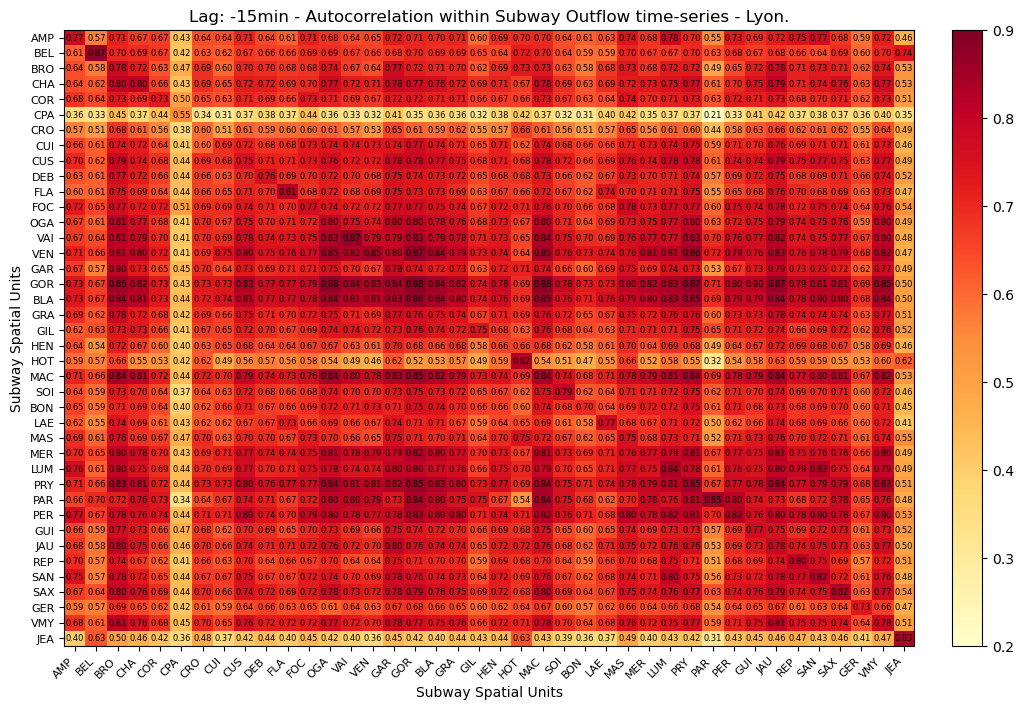

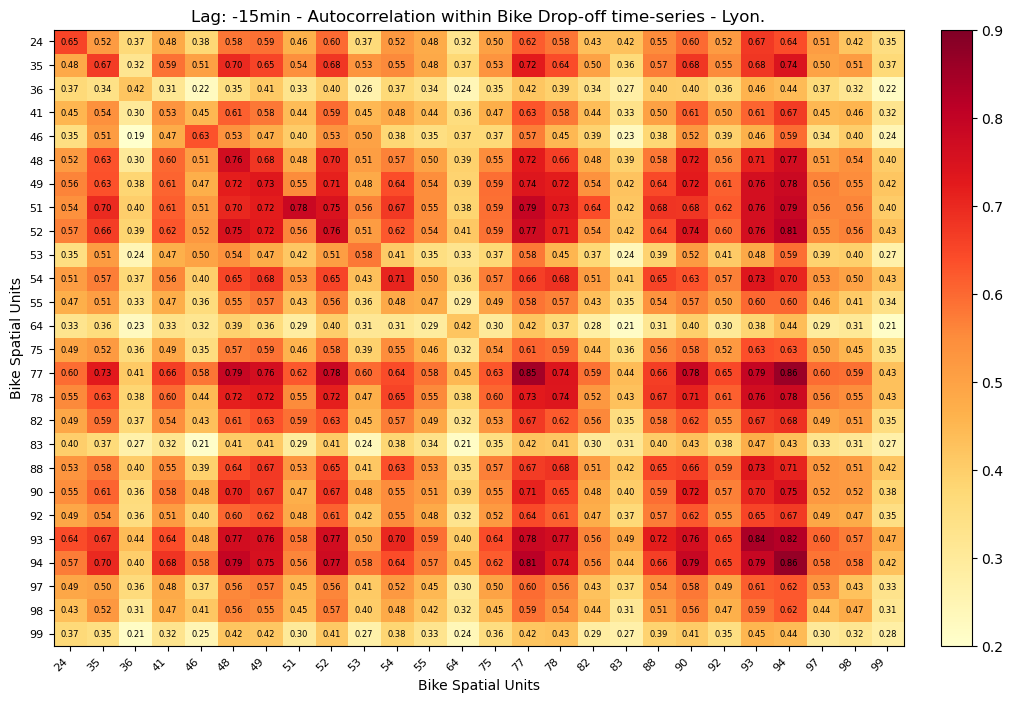

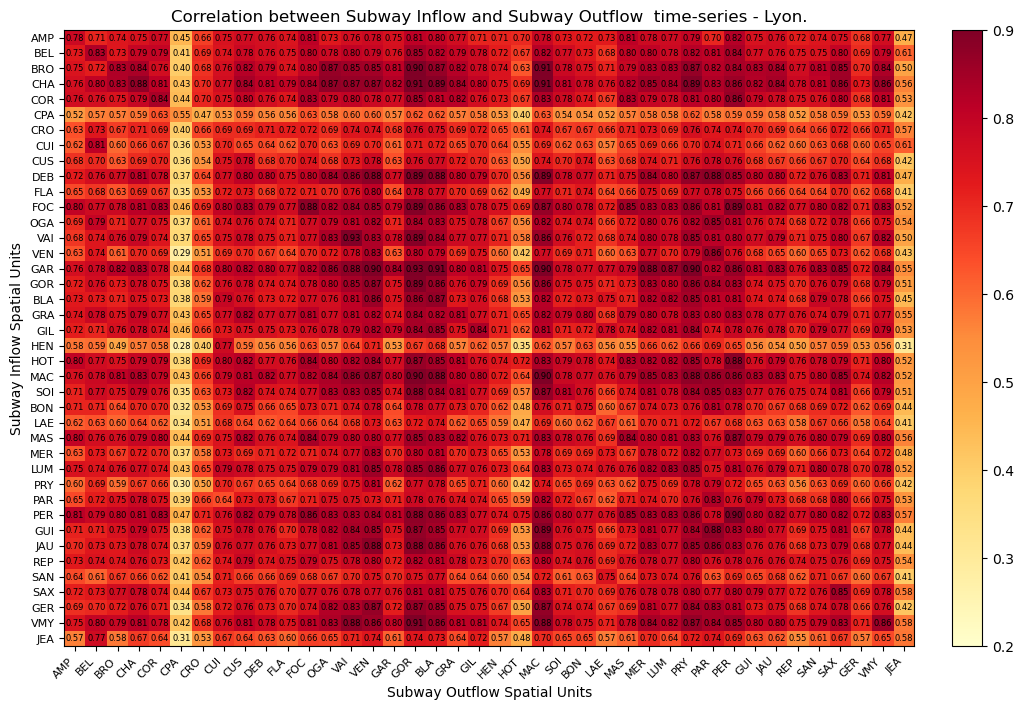

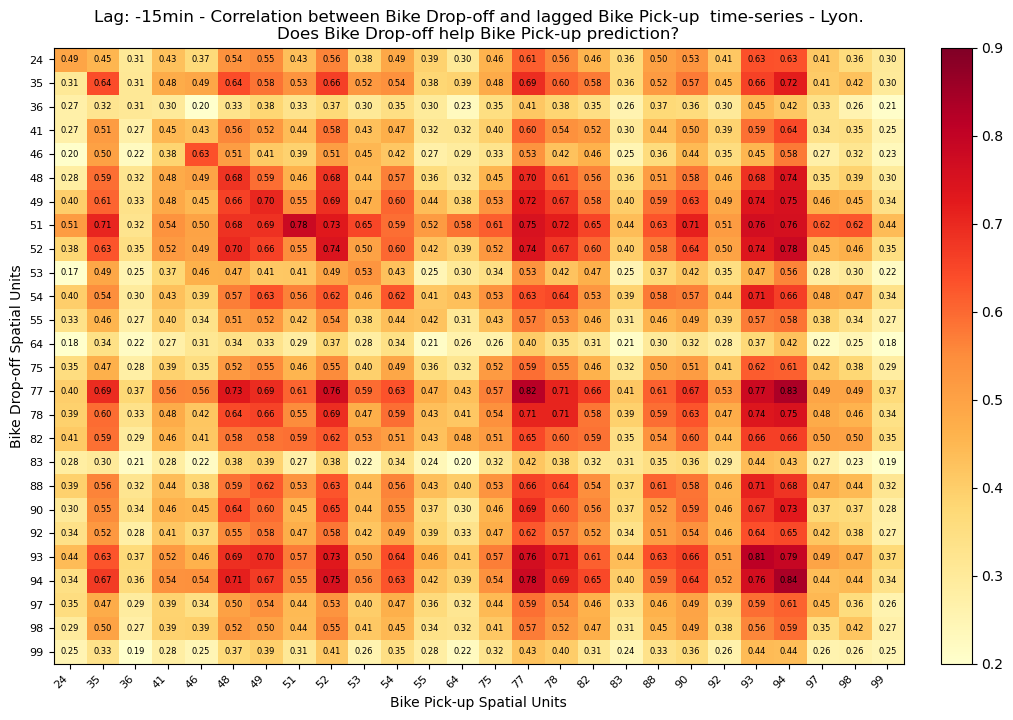

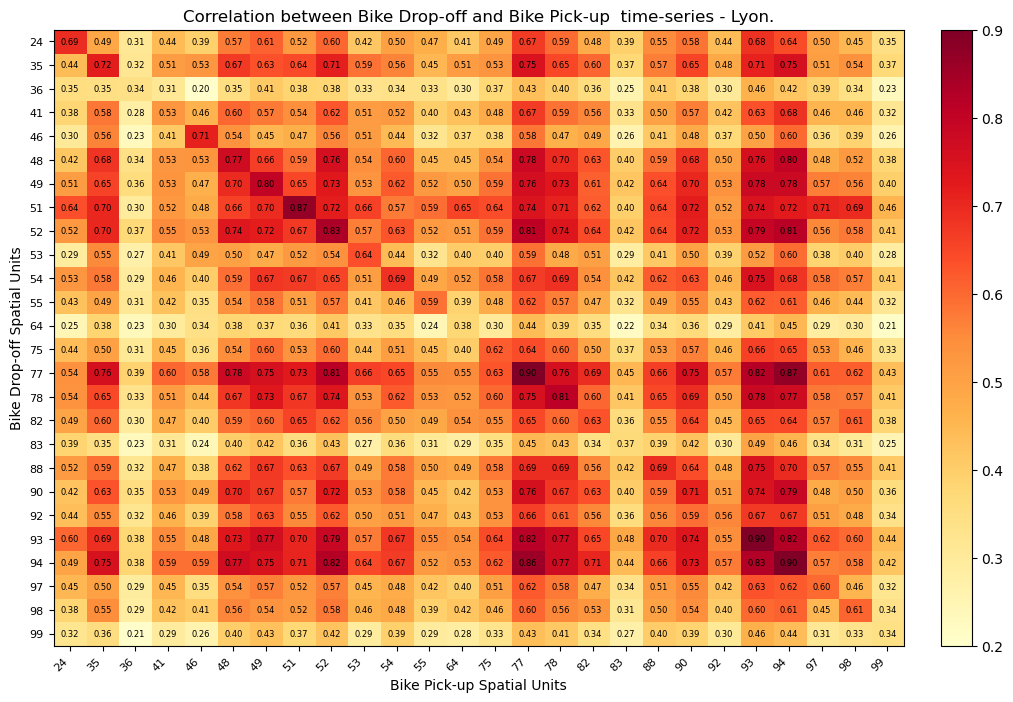

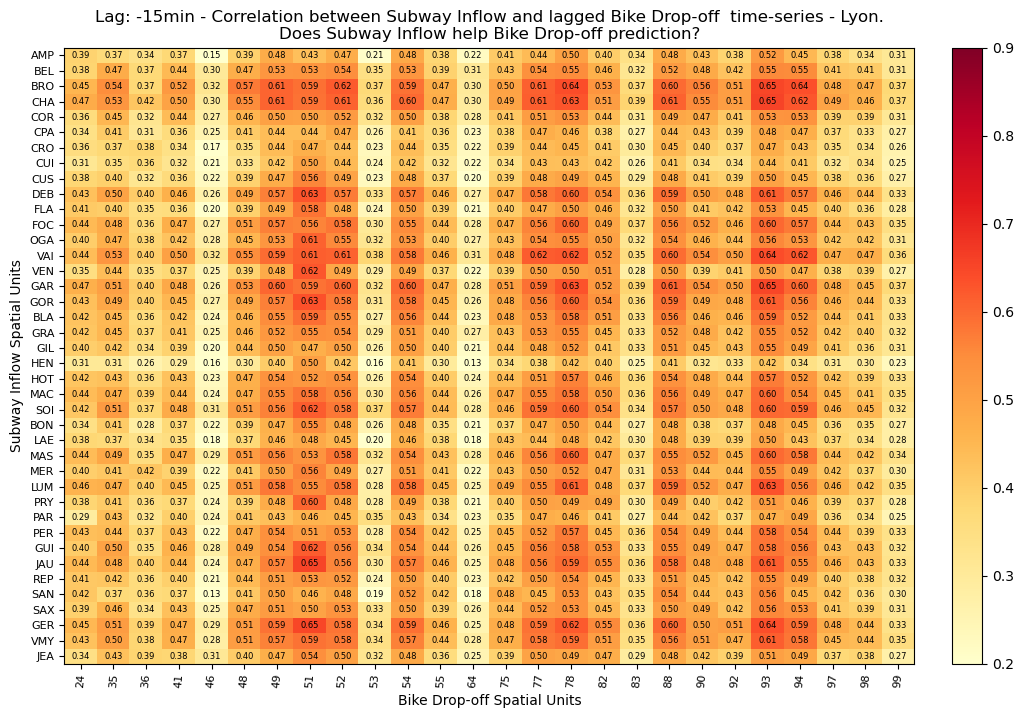

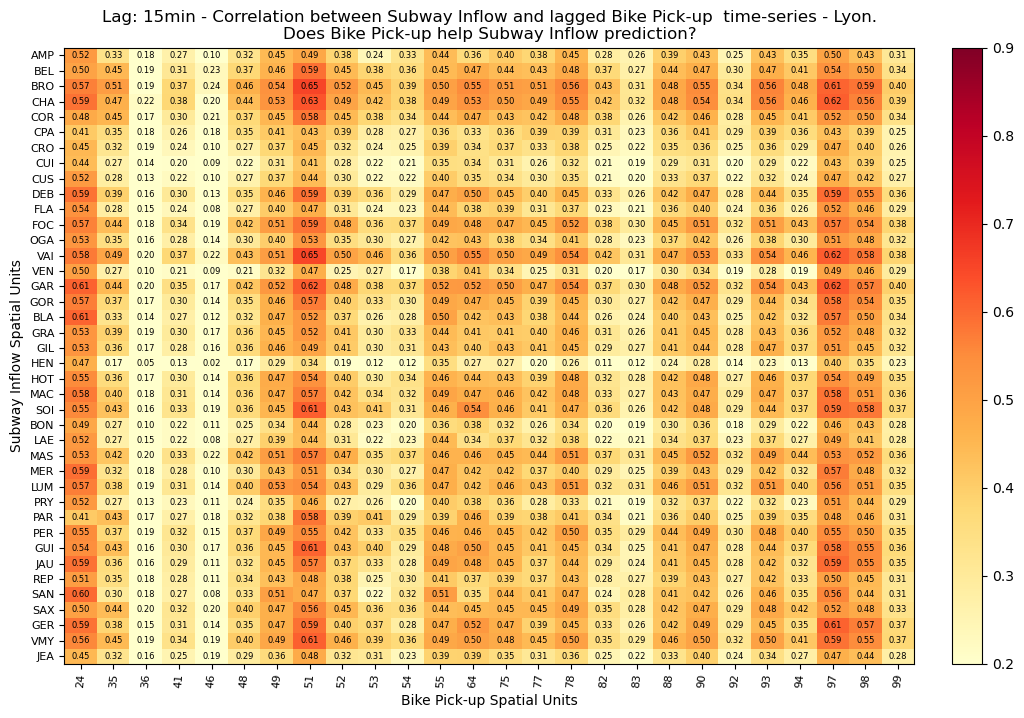

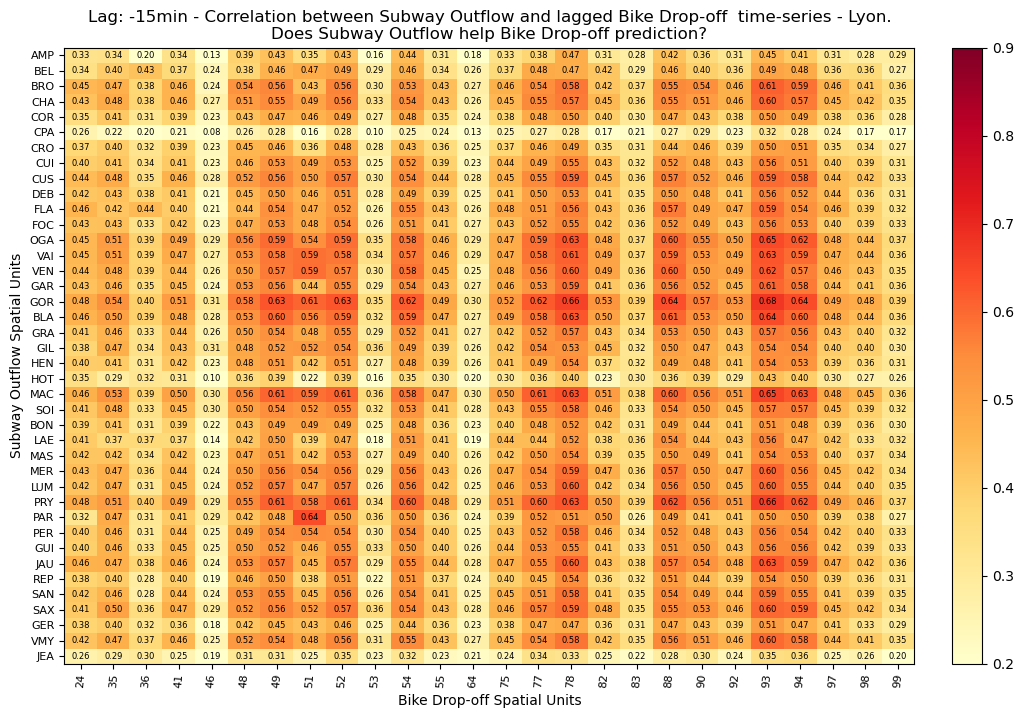

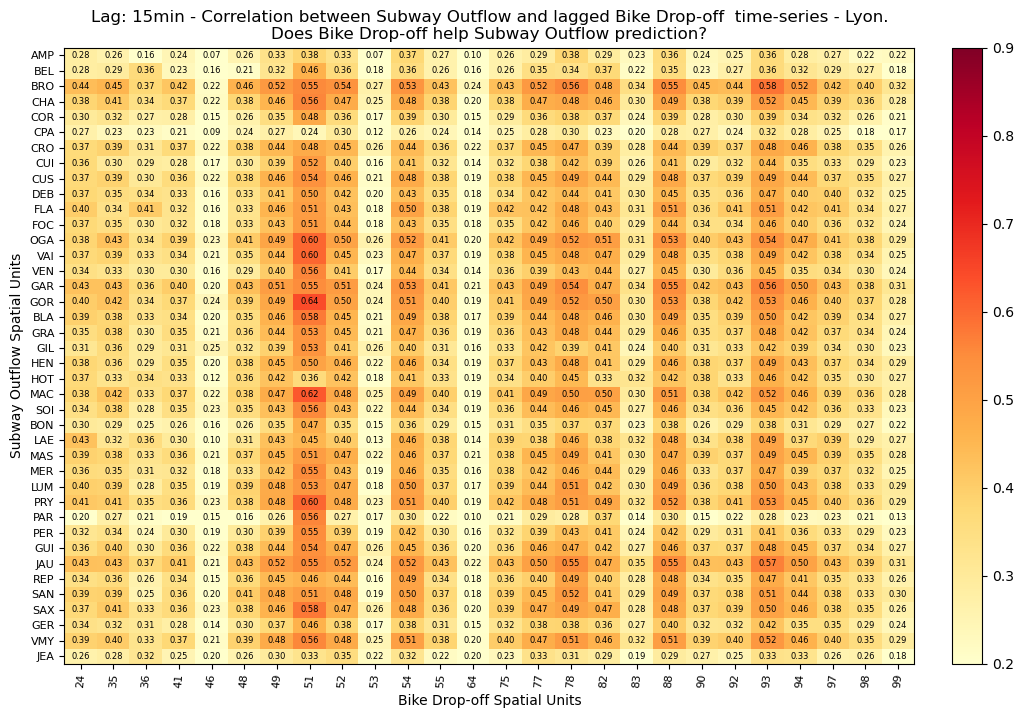

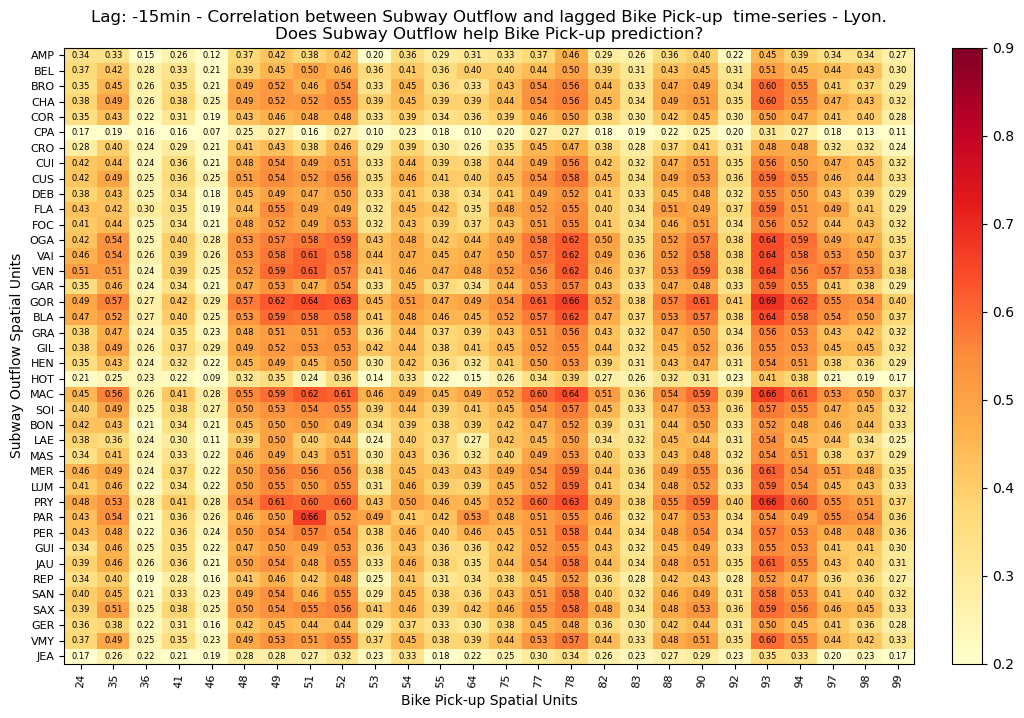

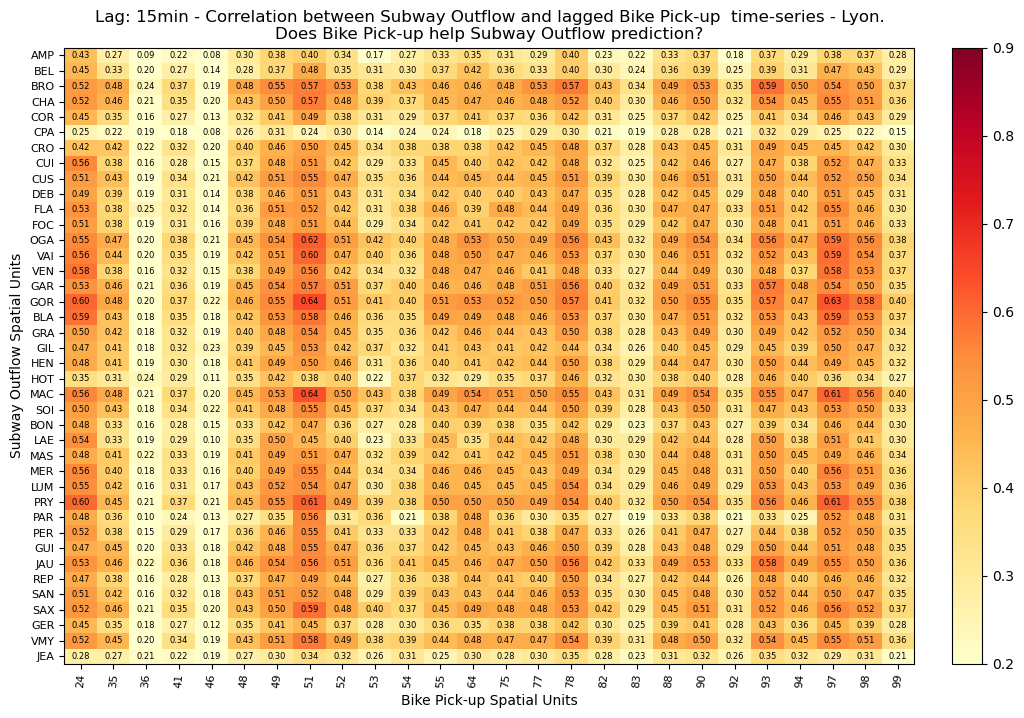

In [30]:
from pipeline.plotting.plotting import plot_coverage_matshow
import matplotlib.pyplot as plt

bool_reversed= False
save_bool = True

cmap ="YlOrRd" # 'hot' #'YlOrRd' # 'RdYlBu'
folder = f"{os.getcwd()}/load_inputs/systematic_analysis/plots/intermodal_dependencies/{temporal_agg_str}"
if not os.path.exists(folder):
    os.mkdir(folder)
    
figsize = (12,8)

dic_corr_results = {'Autocorrelation_within_mode':{'subway_in':{},
                                                    'subway_out':{},
                                                    'bike_in':{},
                                                    'bike_out':{},
                                                   },

                    'Lag_Correlation_between_modes':{'subway_in':{'subway_out':{},
                                                              'bike_in':{},
                                                              'bike_out':{},
                                                              },
                                                'subway_out':{'subway_in':{},
                                                            'bike_in':{},
                                                            'bike_out':{},
                                                            },
                                                 'bike_in':{'bike_out':{},
                                                            'subway_in':{},
                                                            'subway_out':{},
                                                            },
                                                 'bike_out':{'bike_in':{},
                                                            'subway_in':{},
                                                            'subway_out':{},
                                                            },
                                                }
                        }

# Auto Lag-Correlation within mode choice: 
for mode_choice in ['subway','bike']:
    for signal_type in ['in','out']:
        for lag in [-1]: #[-3,-2,-1] 
            # Load raw data: 
            df_raw1 = globals()[f'df_{mode_choice}_raw_{signal_type}'].copy()
            df_raw2 = df_raw1.copy()

            df_raw1.columns = [str(c) + '_1' for c in df_raw1.columns]
            df_raw2.columns = [str(c) + '_2' for c in df_raw2.columns]

            df_raw2 = df_raw2.shift(lag)

            df_combined = pd.concat([df_raw1,df_raw2], axis=1).dropna()
            # ---

            # Get correlation matrix:
            df_corr = df_combined.corr()
            in_columns = df_raw1.columns.tolist()
            out_columns = df_raw2.columns.tolist()
            df_corr_restricted = df_corr.loc[in_columns, out_columns]
            dic_corr_results['Autocorrelation_within_mode'][f"{mode_choice}_{signal_type}"][lag] = df_corr_restricted
            print(f"dic_corr_results['Autocorrelation_within_mode'][f'{mode_choice}_{signal_type}'][{lag}]")
            # ---

            ax = plot_coverage_matshow(df_corr_restricted,
                                    cmap=cmap, save=None,
                                        bool_reversed=bool_reversed, 
                                        v_min=0.2, v_max=0.9, 
                                        display_values=True, 
                                        cbar_magic_args = True,
                                        figsize = figsize,
                                        )
            if mode_choice == 'subway':
                signal_type_str = 'Inflow' if signal_type == 'in' else 'Outflow'
            if mode_choice == 'bike':
                signal_type_str = 'Drop-off' if signal_type == 'in' else 'Pick-up'
            mode_str = f'within Subway {signal_type_str}' if mode_choice == 'subway' else f'within Bike {signal_type_str}' 
      

            title = f"Lag: {lag*15}min - Autocorrelation {mode_str} time-series - {city}." 
            
            save_path = f'{folder}/Autocorrelation_{mode_choice}_{signal_type}_lag{lag}_{city}.pdf'# None
            ax.set_title(title)

            xlabel = f"Subway Spatial Units" if mode_choice == 'subway' else f"Bike Spatial Units"
            ylabel = f"Subway Spatial Units" if mode_choice == 'subway' else f"Bike Spatial Units"
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)

            x_labels = [item.get_text() for item in ax.get_xticklabels()]
            x_labels = [label.replace('_1','').replace('_2','') for label in x_labels]
            ax.set_xticklabels(x_labels)

            y_labels = [item.get_text() for item in ax.get_yticklabels()]
            y_labels = [label.replace('_1','').replace('_2','') for label in y_labels]
            ax.set_yticklabels(y_labels)

            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            if save_bool== True:
                plt.savefig(save_path)




# Lag-Correlation between Subway and Bike time-series
for mode_choice in ['subway','bike']:
    for lag in [-1,0,1]: #[-3,-2,-1,0,1,2,3]:
        # Load raw data: 
        df_raw_in = globals()[f'df_{mode_choice}_raw_in'].copy()
        df_raw_out = globals()[f'df_{mode_choice}_raw_out'].copy()

        df_raw_in.columns = [str(c) + '_in' for c in df_raw_in.columns]
        df_raw_out.columns = [str(c) + '_out' for c in df_raw_out.columns]

        if lag !=0:
            df_raw_out = df_raw_out.shift(lag)

        # Combine data:
        df_combined = pd.concat([df_raw_in,df_raw_out], axis=1).dropna()
        # ---

        # Get correlation matrix:
        df_corr = df_combined.corr()
        in_columns = df_raw_in.columns.tolist()
        out_columns = df_raw_out.columns.tolist()
        df_corr_restricted = df_corr.loc[in_columns, out_columns]

        if lag < 0:
            dic_corr_results['Lag_Correlation_between_modes'][f"{mode_choice}_in"][f"{mode_choice}_out"][lag] = df_corr_restricted
            print(f"dic_corr_results['Lag_Correlation_between_modes'][f'{mode_choice}_in'][f'{mode_choice}_out'][{lag}]")
        if lag > 0:
            dic_corr_results['Lag_Correlation_between_modes'][f"{mode_choice}_out"][f"{mode_choice}_in"][-lag] = df_corr_restricted
            print(f"dic_corr_results['Lag_Correlation_between_modes'][f'{mode_choice}_out'][f'{mode_choice}_in'][{-lag}]")
        # ---

        ax = plot_coverage_matshow(df_corr_restricted,
                                cmap=cmap, save=None,
                                    bool_reversed=bool_reversed, 
                                    v_min=0.2, v_max=0.9, 
                                    display_values=True, 
                                    cbar_magic_args = True,
                                    figsize = figsize,
                                    )

        if lag !=0:
            mode_str = 'Subway Inflow and lagged Subway Outflow' if mode_choice == 'subway' else 'Bike Drop-off and lagged Bike Pick-up'
        else:
            mode_str = 'Subway Inflow and Subway Outflow' if mode_choice == 'subway' else 'Bike Drop-off and Bike Pick-up'

        title = f"Lag: {lag*15}min - Correlation between {mode_str}  time-series - {city}." if lag !=0 else f"Correlation between {mode_str}  time-series - {city}."

        if mode_choice == 'subway':
            signal_in_str = 'Outflow'
            signal_out_str = 'Inflow'
            mode_choice_str = 'Subway'
        if mode_choice == 'bike':
            signal_in_str = 'Pick-up'
            signal_out_str = 'Drop-off'
            mode_choice_str = 'Bike'

        title = title + ('\n' +f"Does {mode_choice_str} {signal_out_str} help {mode_choice_str} {signal_in_str} prediction?" ) if lag <0 else title + ('\n' + f"Does {mode_choice_str} {signal_in_str} help {mode_choice_str} {signal_out_str} prediction?") if lag >0 else title
        
        save_path = f'{folder}/{mode_choice}_in_out_lag{lag}_{city}.pdf'# None
        ax.set_title(title)

        xlabel = f"Subway Outflow Spatial Units" if mode_choice == 'subway' else f"Bike Pick-up Spatial Units"
        ylabel = f"Subway Inflow Spatial Units" if mode_choice == 'subway' else f"Bike Drop-off Spatial Units"
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

        x_labels = [item.get_text() for item in ax.get_xticklabels()]
        x_labels = [label.replace('_out','').replace('_in','') for label in x_labels]
        ax.set_xticklabels(x_labels)

        y_labels = [item.get_text() for item in ax.get_yticklabels()]
        y_labels = [label.replace('_out','').replace('_in','') for label in y_labels]
        ax.set_yticklabels(y_labels)

        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        if save_bool== True:
            plt.savefig(save_path)





# Lag-Correlation between Subway and Bike time-series
for signal_subway in ['in','out']:
    for signal_bike in ['in','out']:
        for lag in [-1,1]: #[-3,-2,-1,0,1,2,3]:
            # Load raw data: 
            df_raw_subway = globals()[f'df_subway_raw_{signal_subway}'].copy()
            df_raw_bike = globals()[f'df_bike_raw_{signal_bike}'].copy()
            if lag !=0:
                df_raw_bike = df_raw_bike.shift(lag)

            # If lag < 0 : Subway help Bike Prediction 
            # If lag > 0 : Bike help Subway Prediction
            # ---

            # Combine data:
            df_combined = pd.concat([df_raw_subway,df_raw_bike], axis=1).dropna()
            # ---

            # Get correlation matrix:
            df_corr = df_combined.corr()
            bike_columns = df_raw_bike.columns.tolist()
            subway_columns = df_raw_subway.columns.tolist()
            df_corr_restricted = df_corr.loc[subway_columns, bike_columns]
            if lag < 0:
                dic_corr_results['Lag_Correlation_between_modes'][f"subway_{signal_subway}"][f"bike_{signal_bike}"][lag] = df_corr_restricted
                # dic_corr_results['Lag_Correlation_between_modes'][f"bike_{signal_bike}"][f"subway_{signal_subway}"][-lag] = df_corr_restricted
                print(f"dic_corr_results['Lag_Correlation_between_modes'][f'subway_{signal_subway}'][f'bike_{signal_bike}'][{lag}]")
            if lag > 0:
                dic_corr_results['Lag_Correlation_between_modes'][f"bike_{signal_bike}"][f"subway_{signal_subway}"][-lag] = df_corr_restricted
                print(f"dic_corr_results['Lag_Correlation_between_modes'][f'bike_{signal_bike}'][f'subway_{signal_subway}'][-{lag}]")
                # dic_corr_results['Lag_Correlation_between_modes'][f"subway_{signal_subway}"][f"bike_{signal_subway}"][-lag] = df_corr_restricted


        # ---
            # ---


    
            ax = plot_coverage_matshow(df_corr_restricted,
                                    cmap=cmap, save=None,
                                        bool_reversed=bool_reversed, 
                                        v_min=0.2, v_max=0.9, 
                                        display_values=True, 
                                        cbar_magic_args = True,
                                        figsize = figsize,
                                        )
            signal_subway_str = 'Outflow' if signal_subway == 'out' else 'Inflow'
            signal_bike_str = 'Pick-up' if signal_bike == 'out' else 'Drop-off'
            title = f"Lag: {lag*15}min - Correlation between Subway {signal_subway_str} and lagged Bike {signal_bike_str}  time-series - {city}." if lag !=0 else f"Correlation between Subway {signal_subway_str} and Bike {signal_bike_str}  time-series - {city}."

            title = title + ('\n' + f"Does Subway {signal_subway_str} help Bike {signal_bike_str} prediction?") if lag <0 else title + ('\n' +f"Does Bike {signal_bike_str} help Subway {signal_subway_str} prediction?" ) if lag >0 else title

            save_path = f'{folder}/subway{signal_subway}_bike{signal_bike}_lag{lag}_{city}.pdf'# None
            ax.set_title(title)
            xlabel = f"Bike {signal_bike_str} Spatial Units"
            ylabel = f"Subway {signal_subway_str} Spatial Units"
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            if save_bool== True:
                plt.savefig(save_path)





## Load NetMob

In [31]:
from constants.paths import FOLDER_PATH
from load_inputs.systematic_analysis.load_netmob import load_dataset,get_list_apps,get_list_days,get_DL_UL_paths,read_csv,load_netmob_gdf
from load_inputs.systematic_analysis.utils import get_histogram_per_day_type,get_boxplot_per_spatial_unit_per_day_type,heatmap
from load_inputs.systematic_analysis.utils import IN_bdc,OUT_bdc,IN_nbdc,OUT_nbdc
from load_inputs.systematic_analysis.utils import preprocess_df

folder_path = f'{FOLDER_PATH}/../raw_data/NetMob/'
shp_iris_path = f'{FOLDER_PATH}/../raw_data/lyon_iris_shapefile/'
path_save = '../../../../../../data/NetMob/NetMob_Lyon'
folder_path = '../../../../../../data/NetMob/NetMob_raw'

df_summed_signal = pd.DataFrame()
for app in ['Deezer','Google_Maps','Web_Weather']:
    # ['Instagram','Snapchat','Facebook_Messenger','WhatsApp','Deezer','Spotify','Google_Maps','Uber','Web_Weather',
    #         ]:
    # Load Datasets:
    data = np.load(f'{path_save}/{app}.npy')
    idx = pd.read_pickle(f'{path_save}/index.pkl')
    cols = pd.read_pickle(f'{path_save}/columns.pkl')

    df_loaded = pd.DataFrame(data, index=idx, columns=cols)
    ts = df_loaded.sum(1)
    df_summed_signal[app] = ts
print(df_summed_signal.head())

                          Deezer  Google_Maps  Web_Weather
2019-03-16 00:00:00  165163204.0   24696176.0    2646275.0
2019-03-16 00:15:00  178654812.0   21915118.0    3414444.0
2019-03-16 00:30:00  125104102.0   21817044.0    2447842.0
2019-03-16 00:45:00  103515366.0   21833612.0    2484113.0
2019-03-16 01:00:00  117259692.0   22420648.0    2234372.0


In [32]:
dic_df_raw_copy['netmob'] = df_summed_signal.copy()

df_i = dic_df_raw_copy['netmob'].copy()

df_filtered = filter_by_temporal_agg(df_i, 
                                        temporal_agg, 
                                        city = 'Lyon',
                                    start = start,
                                    end=end,
                                    )

df_summed_signal = df_filtered.copy()


Number of remaining time-slots after filtering 1071


# Lag correlation between NetMob and Traffic variable

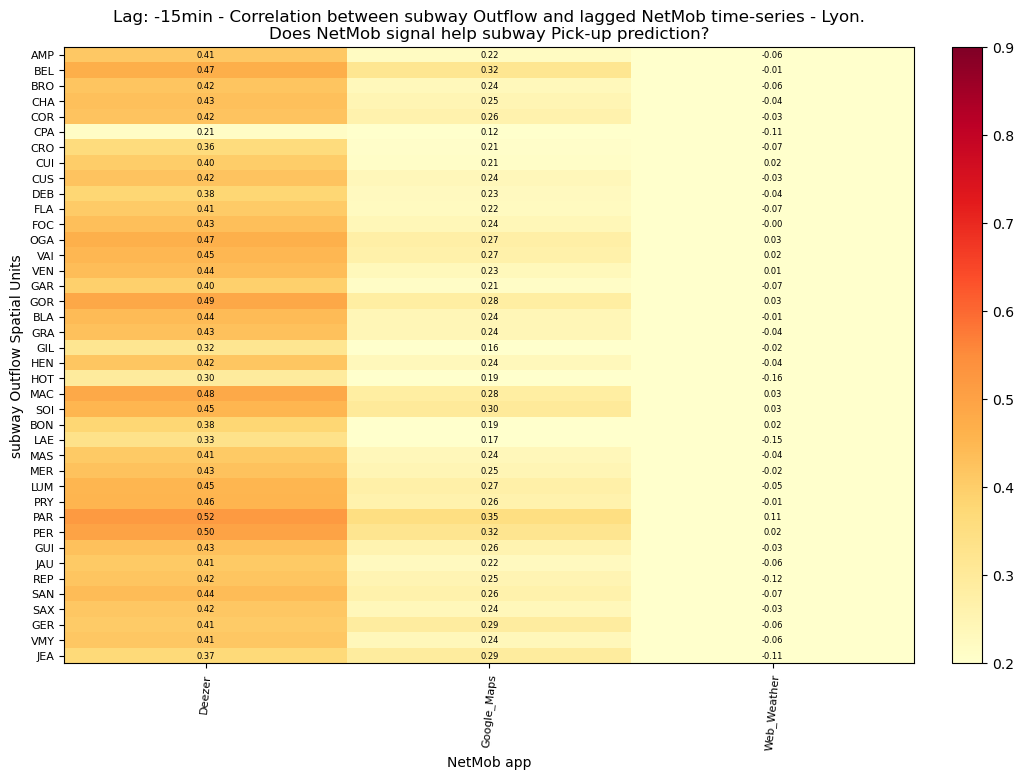

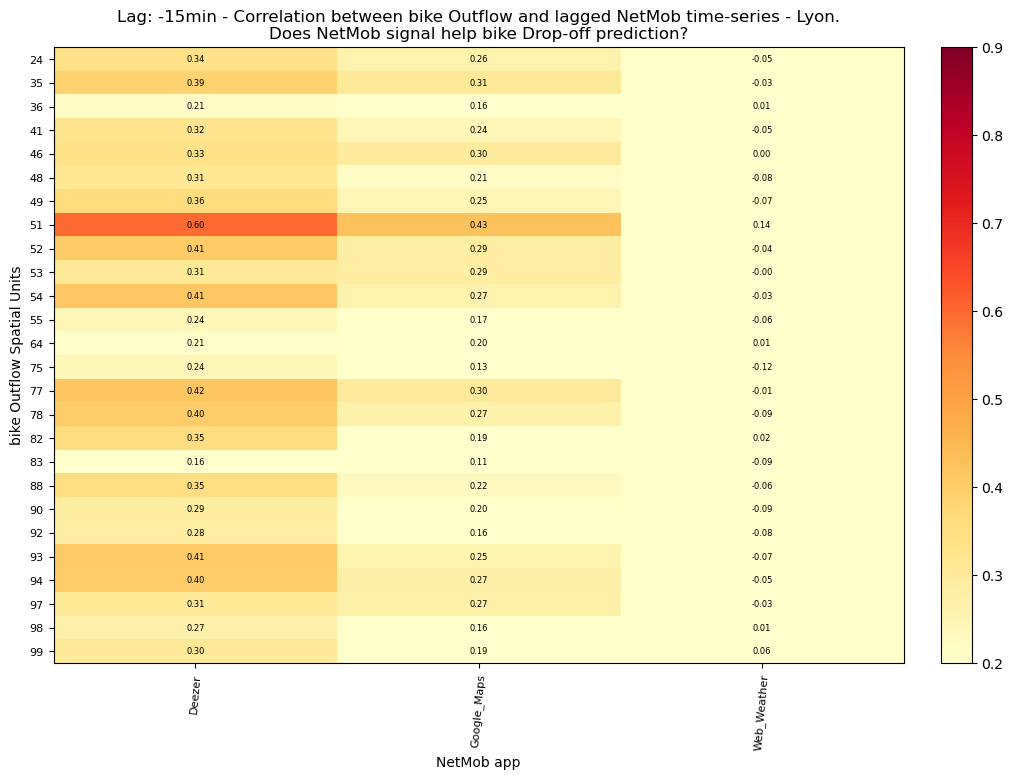

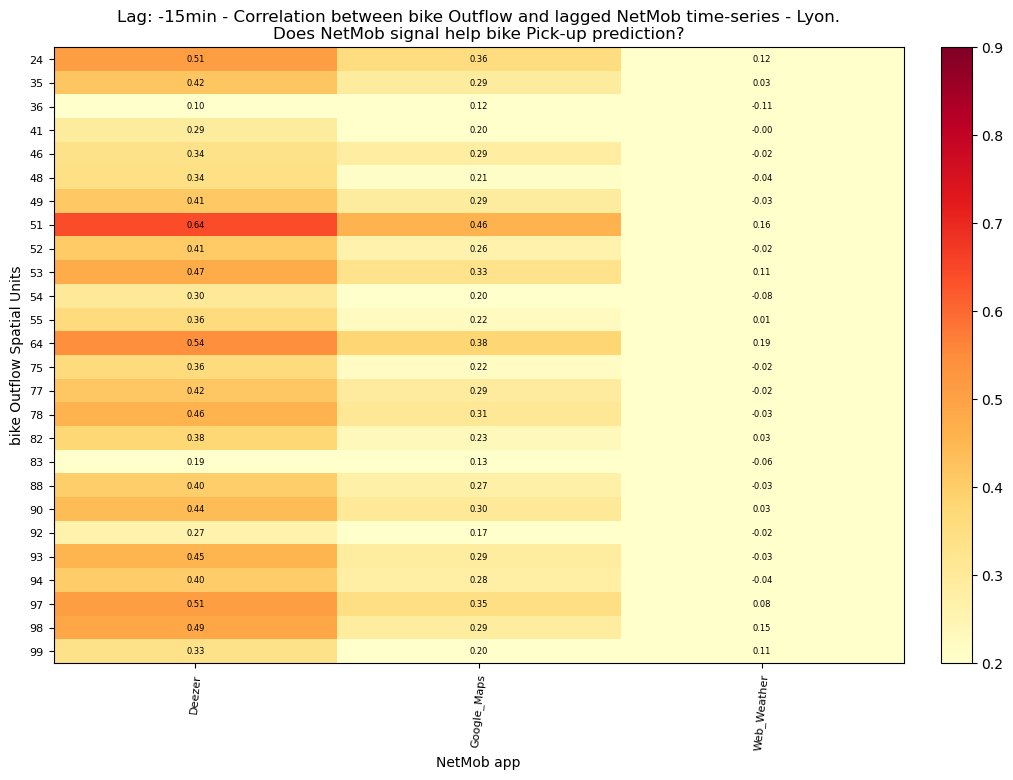

In [33]:
# Lag-Correlation between Subway and Bike time-series
for mode_choice in ['subway','bike']:
    for signal in ['in','out']:
        for lag in [-1]: #[-3,-2,-1]:
            # Load raw data: 
            df_raw = globals()[f'df_{mode_choice}_raw_{signal}'].copy()
            df_lagged = df_summed_signal.copy().shift(lag)

            df_raw_restricted = df_raw.loc[df_lagged.index]


            # Combine data:
            df_combined = pd.concat([df_raw_restricted,df_lagged], axis=1).dropna()
            # ---

            # Get correlation matrix:
            df_corr = df_combined.corr()
            lagged_columns = df_lagged.columns.tolist()
            df_columns = df_raw_restricted.columns.tolist()
            df_corr_restricted = df_corr.loc[df_columns, lagged_columns]

            if 'netmob' not in dic_corr_results['Lag_Correlation_between_modes'][f"{mode_choice}_{signal}"].keys():
                dic_corr_results['Lag_Correlation_between_modes'][f"{mode_choice}_{signal}"]['netmob'] = {}
            dic_corr_results['Lag_Correlation_between_modes'][f"{mode_choice}_{signal}"][f"netmob"][lag] = df_corr_restricted
            

            ax = plot_coverage_matshow(df_corr_restricted,
                                    cmap=cmap, save=None,
                                        bool_reversed=bool_reversed, 
                                        v_min=0.2, v_max=0.9, 
                                        display_values=True, 
                                        cbar_magic_args = True,
                                        figsize = figsize,
                                        )
            
            if mode_choice == 'subway':
                signal_str = 'Outflow' if signal == 'out' else 'Inflow'
            if mode_choice == 'bike':
                signal_bike_str = 'Pick-up' if signal == 'out' else 'Drop-off'
            title = f"Lag: {lag*15}min - Correlation between {mode_choice} {signal_subway_str} and lagged NetMob time-series - {city}."

            title = title + ('\n' + f"Does NetMob signal help {mode_choice} {signal_bike_str} prediction?") 

            save_path = f'{folder}/{mode_choice}_{signal}_netmob_lag{lag}_{city}.pdf'# None
            ax.set_title(title)
            xlabel = f"NetMob app"
            ylabel = f"{mode_choice} {signal_subway_str} Spatial Units"
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            if save_bool== True:
                plt.savefig(save_path)



Saved global heatmap to /home/rrochas/prediction-validation/load_inputs/systematic_analysis/plots/intermodal_dependencies/1600_2100_business_day/Global_Heatmap_Target_subway_in_lag-1_Lyon.pdf


Saved global heatmap to /home/rrochas/prediction-validation/load_inputs/systematic_analysis/plots/intermodal_dependencies/1600_2100_business_day/Global_Heatmap_Target_subway_out_lag-1_Lyon.pdf


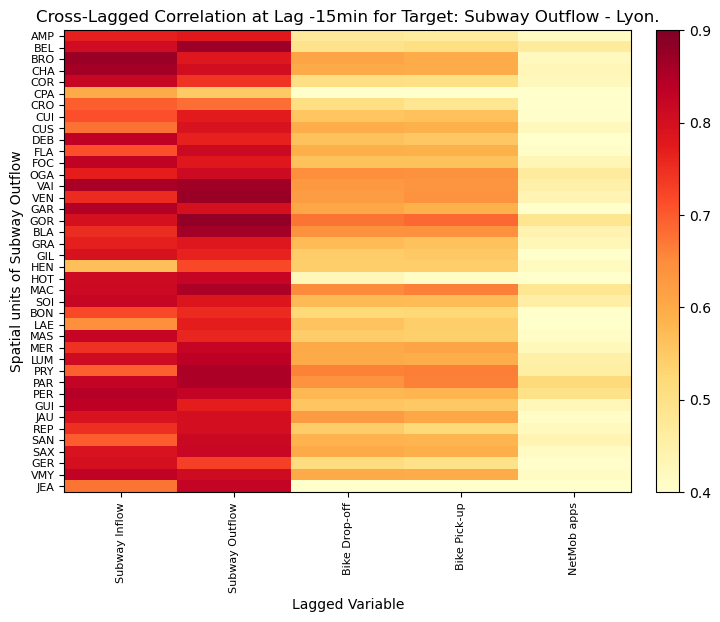

Saved global heatmap to /home/rrochas/prediction-validation/load_inputs/systematic_analysis/plots/intermodal_dependencies/1600_2100_business_day/Global_Heatmap_Target_bike_in_lag-1_Lyon.pdf


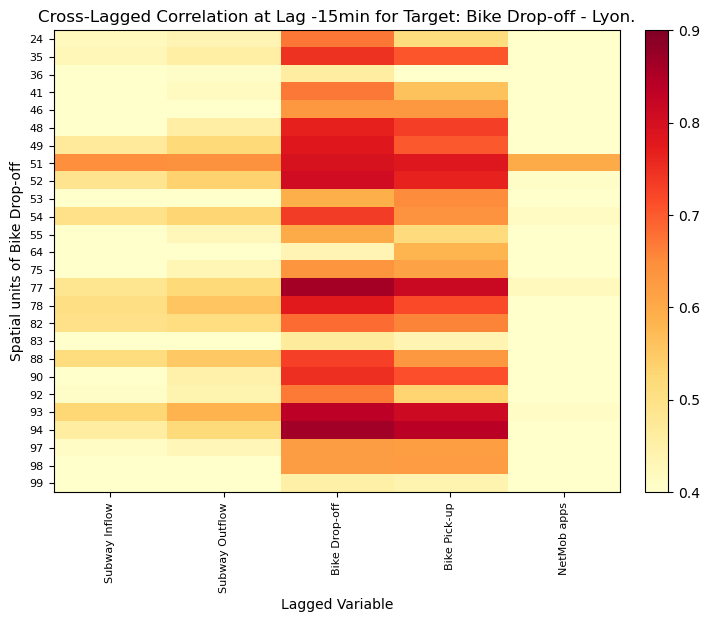

Saved global heatmap to /home/rrochas/prediction-validation/load_inputs/systematic_analysis/plots/intermodal_dependencies/1600_2100_business_day/Global_Heatmap_Target_bike_out_lag-1_Lyon.pdf


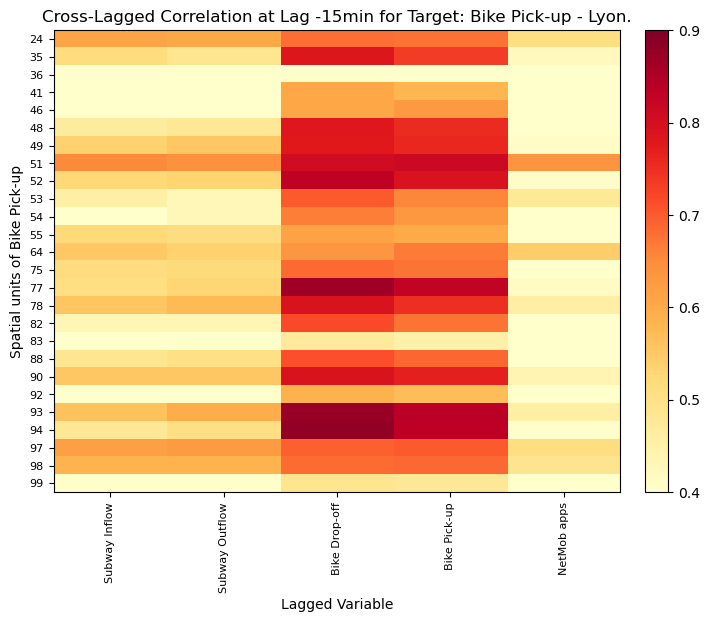

In [40]:
# Configuration des labels pour l'affichage
label_map = {
    'subway_in': 'Subway Inflow',
    'subway_out': 'Subway Outflow',
    'bike_in': 'Bike Drop-off',
    'bike_out': 'Bike Pick-up'
}

modes = ['subway_in', 'subway_out', 'bike_in', 'bike_out']
predictors = ['subway_in', 'subway_out', 'bike_in', 'bike_out','netmob']
lag = -1


for target in modes:
    list_dfs_predictors = []
    for predictor in predictors:
        # Cas 1 : Autocorrélation (Même mode, même signal)
        if target == predictor:
            s_corr = dic_corr_results['Autocorrelation_within_mode'][target][lag].max(1).copy()
         
        # Cas 2 : Corrélation croisée (Différent mode ou signal)
        else:
            if 'subway' in target : 
                s_corr = dic_corr_results['Lag_Correlation_between_modes'][target][predictor][lag].max(1).copy()
            else:
                if 'netmob' in predictor:
                    s_corr = dic_corr_results['Lag_Correlation_between_modes'][target][predictor][lag].max(1).copy()
                else:
                    s_corr = dic_corr_results['Lag_Correlation_between_modes'][target][predictor][lag].max(0).copy()
      
        
        s_corr.index = [str(index_i).replace('_in','').replace('_out','').replace('_1','').replace('_2','') for index_i in s_corr.index]
        s_corr.name = predictor

        
        list_dfs_predictors.append(s_corr)

        
    df_global_corr = pd.concat(list_dfs_predictors, axis=1)
    # Génération du plot
    # Note : figsize ajusté (24, 8) pour accommoder la largeur des 4 matrices concaténées
    ax = plot_coverage_matshow(
        df_global_corr,
        cmap=cmap, 
        save=None,
        bool_reversed=bool_reversed, 
        v_min=0.4,  # Seuil demandé (Attention aux zones vides)
        v_max=0.9, 
        display_values=False, # Désactivé pour lisibilité sur une grande matrice
        cbar_magic_args=True,
        figsize=(8, 6) 
    )

    # Titres et Labels
    target_str = label_map[target]
    title = (f"Cross-Lagged Correlation at Lag -15min for Target: {target_str} - {city}.")
    
    ax.set_title(title)
    ax.set_ylabel(f"Spatial units of {target_str}")
    ax.set_xlabel("Lagged Variable")

    # rename label in Subway Inflow, Subway Outflow, Bike Drop-off, Bike Pick-up, NetMob apps
    x_labels = [item.get_text() for item in ax.get_xticklabels()]
    x_labels_renamed = [label_map.get(label, label) if label != 'netmob' else 'NetMob apps' for label in x_labels]
    ax.set_xticklabels(x_labels_renamed)

    # Gestion sommaire des ticks X pour éviter la surcharge
    # On ne garde que quelques labels ou on laisse matplotlib gérer si plot_coverage_matshow le permet
    # Ici, on applique une rotation pour tenter de garder lisible
    plt.xticks(rotation=90)

    # Sauvegarde
    save_path = f'{folder}/Global_Heatmap_Target_{target}_lag{lag}_{city}.pdf'
    plt.savefig(save_path, bbox_inches='tight')
    print(f"Saved global heatmap to {save_path}")
    
    plt.show() # Décommenter pour afficher
    # plt.close()